<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">in his name</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> Introduction to Neural networks (Simple MLP)</div></center></h1>

In [81]:
import numpy as np # For matrix math
import matplotlib.pyplot as plt # For plotting

import sys # For printing

In [82]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [128]:
X[0]

array([0, 1])

In [83]:
num_i_units = 2 # Number of Input units
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

In [84]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 2000

# Number of training examples
m = 4

In [85]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2 
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2 

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

print("Initial weights : ")
print("B1 = ", B1, "\nB2 = " , B2, "\nW1 = ", W1, "\nW2 = ", W2)

Initial weights : 
B1 =  [[0.41919451]
 [0.6852195 ]] 
B2 =  [[0.20445225]] 
W1 =  [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]] 
W2 =  [[ 0.86540763 -2.3015387 ]]


In [86]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

# #activation function
# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def sigmoid_der(x):
#     return x*(1-x)


In [129]:
def forward(x, predict=False):
    a1 = np.array(x.reshape(x.shape[0], 1)) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

In [88]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

In [89]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
#             sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back prop.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) #+ ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) #+ ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m)  + np.sum(np.power(_W2, 2))#+ ( (reg_param / (2 * m)) * (np.sum(np.power(_W1, 2))))
    return (_W1, _W2, _B1, _B2)

In [90]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

In [91]:
print("TRAINED weights : ")
print("B1 = ", B1, "\nB2 = " , B2, "\nW1 = ", W1, "\nW2 = ", W2)


TRAINED weights : 
B1 =  [[0.40184256]
 [0.21484733]] 
B2 =  [[0.29447156]] 
W1 =  [[ 1.45493377 -0.49151608]
 [-0.73216393 -1.18103431]] 
W2 =  [[ 0.6338485  -2.10352765]]


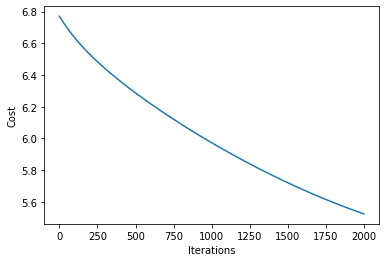

In [132]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()

In [174]:
# ipnut train and test data
# test_data = np.array([
#      [0.988, 1.000], 
#      [0.001, 0.700], 
#      [0.100, 0.100], 
#      [0.950, 0.002]
#     [0.750, 0.990]
# ])

XOR_test_label = np.array([[1], [1], [1], [1], [1], [0], [1], [0], [1], [0], [1], [1], [1], [1]])

n=[]
X = np.array([[0.98, 1], [0.01, 0.97], [0.77, 0.99], [0.912, 1.002], [0.88, 0.11], [0.82, 0.9], [0.8, 1], [0.02, 0.01],
             [0.21, 0.99], [0.11, 0.2], [0.79, 1], [0.11, 1.02], [0.98, 0.87], [0.2, 1.3]])

# The labels for the training data.
# y = np.array([
#     [1],
#     [1],
#     [0],
#     [0],
#     [0]
# ])

for j in range(len(X)):
#             sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Prop.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = W1.dot(a0) + B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = W2.dot(a1) + B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1
            label = np.around(a2)
            n.append(label)
            

In [173]:
def get_accuracy(predicts, XOR_test_label):
    c = 0
    predicts_arr = np.array(predicts)
    for i in range(len(predicts_arr)):
        if predicts_arr[i] == XOR_test_label[i]:
            c += 1
    accuracy = c/len(XOR_test_label)*100
    return accuracy 

print('The accuracy of our XOR MLP is : {:f}%'.format(get_accuracy(n, XOR_test_label)), end = "\n\n")

The accuracy of our XOR MLP is : 92.857143%

